<a href="https://www.kaggle.com/m0hammednasser/titanic?scriptVersionId=83021228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
gender_submission_df =pd.read_csv('../input/titanic/gender_submission.csv')
all_data = pd.concat([train_df ,test_df ])

In [3]:
# view train data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:ylabel='Frequency'>

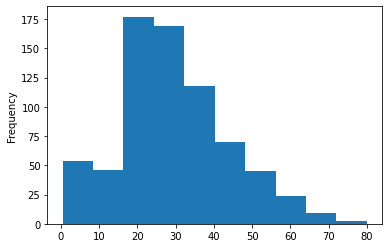

In [4]:
train_df.Age.plot.hist()

In [5]:
# view test data
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# view submission
gender_submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [9]:
print('tain_df')
train_df.info()
print('='*50+'\n')
print('test_df')
test_df.info()
print('='*50+'\n')
print('the shape of tain_df is :', train_df.shape)
print('the shape of test_df is :', test_df.shape)
print('the shape of gender_submission_df is :', gender_submission_df.shape)

tain_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

test_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int6

In [10]:
# missing value
print('tain_df')
display(train_df.isna().sum())
print('='*50+'\n')
print('test_df')
test_df.isna().sum()


tain_df


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test_df


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Analyze & Visualize data

0    549
1    342
Name: Survived, dtype: int64


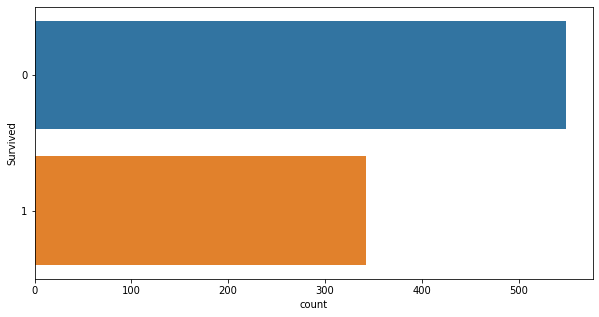

In [11]:

print(train_df.Survived.value_counts())
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , y='Survived');

In [12]:
train_df[['Pclass' , 'Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


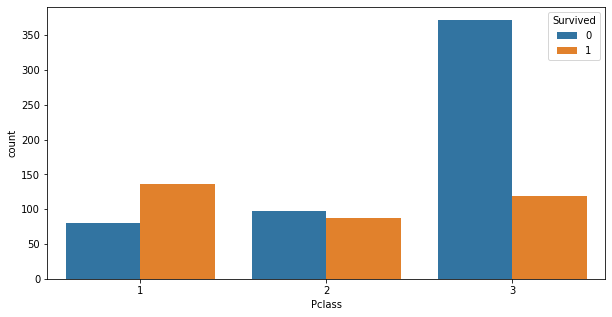

In [13]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Pclass' , hue ='Survived');

In [14]:
train_df[['Embarked' , 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


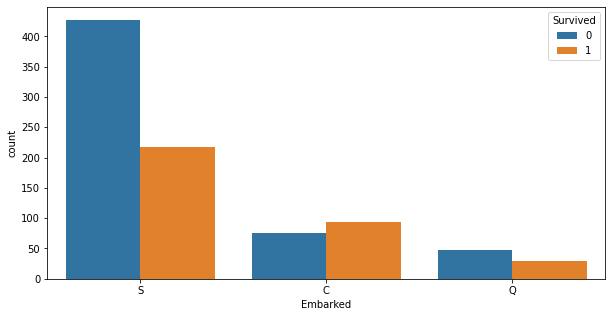

In [15]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Embarked' , hue ='Survived');

In [16]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


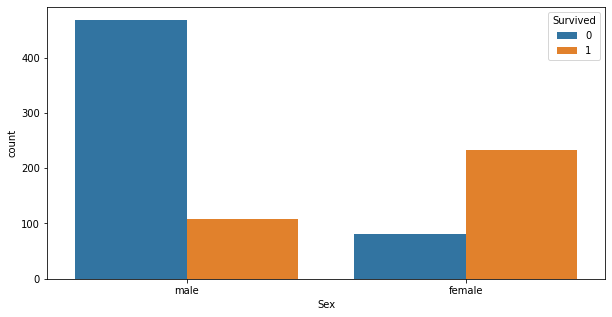

In [17]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Sex' , hue ='Survived');

In [18]:
train_df[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by = 'Survived' , ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


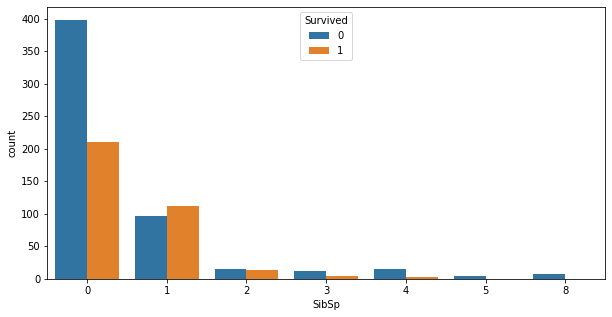

In [19]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'SibSp' , hue ='Survived');

In [20]:
train_df[['Parch' , 'Survived']].groupby('Parch' , as_index=False).mean().sort_values(by = 'Survived' , ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


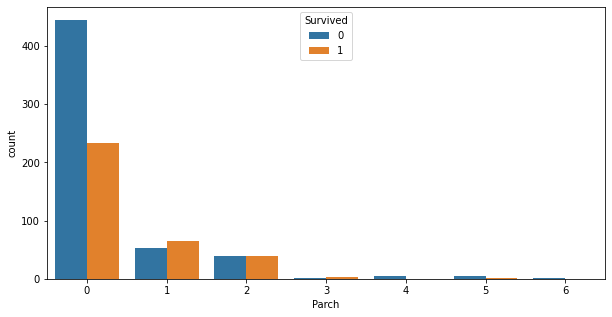

In [21]:
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_df , x = 'Parch' , hue ='Survived')
plt.legend(title = 'Survived',loc = 'upper center');

In [22]:
train_df[['Fare', 'Survived']].groupby('Survived', as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


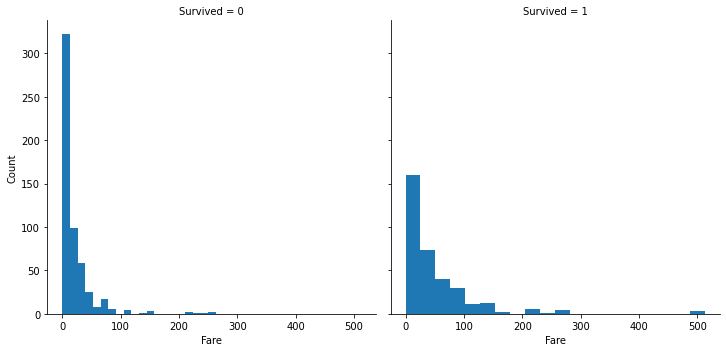

In [23]:
grid = sns.FacetGrid(train_df , col = 'Survived' , height=5)
grid.map(plt.hist , 'Fare',bins = 20 )
grid.set_ylabels('Count');

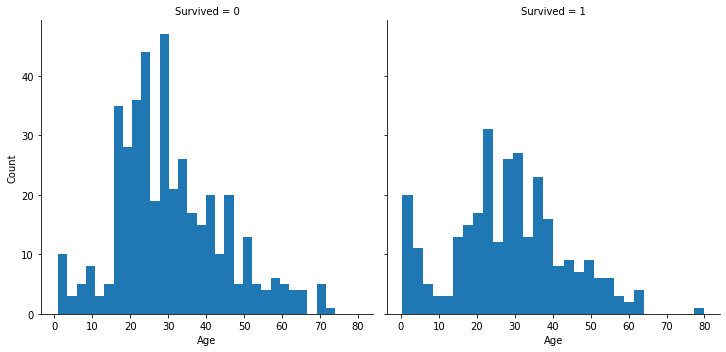

In [24]:
grid = sns.FacetGrid(train_df , col = 'Survived' , height=5)
grid.map(plt.hist , 'Age',bins = 30 )
grid.set_ylabels('Count');

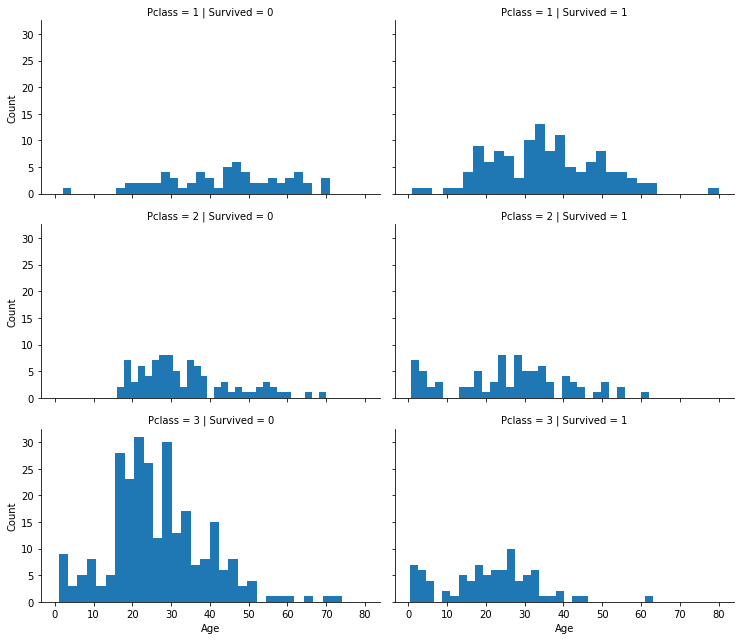

In [25]:
grid = sns.FacetGrid(train_df , col = 'Survived' , row = 'Pclass' , height = 3  , aspect=1.7)
grid.map(plt.hist , 'Age',bins = 30 )
grid.set_ylabels('Count');

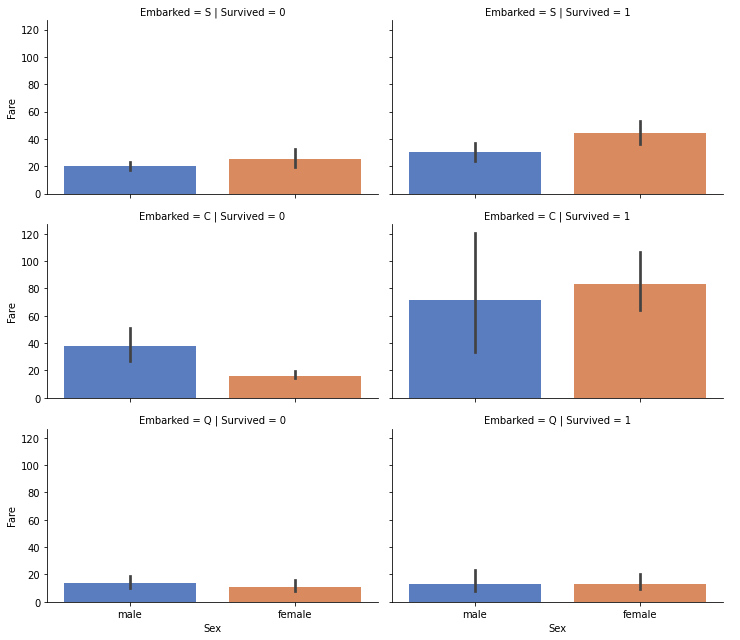

In [26]:
grid = sns.FacetGrid(train_df , col = 'Survived' , row = 'Embarked' , height = 3  , aspect=1.7)
grid.map(sns.barplot, 'Sex', 'Fare' , palette='muted' ,order = ['male' , 'female'] )
grid.add_legend();

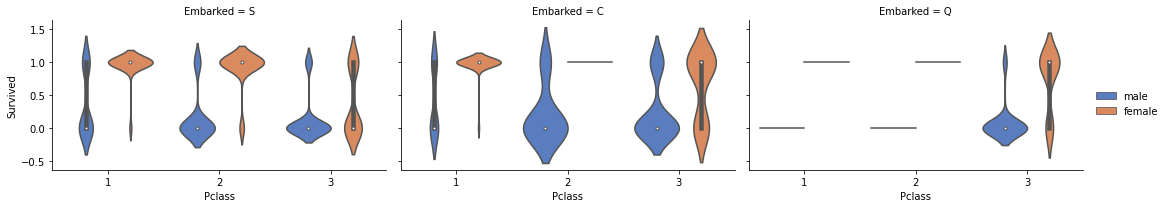

In [27]:
grid = sns.FacetGrid(train_df, col='Embarked', height = 3, aspect=1.7)
grid.map(sns.violinplot, 'Pclass', 'Survived', 'Sex', palette='muted' , order = [1,2,3] ,  hue_order =['male' , 'female'] )
grid.add_legend();


# Wrangle data

## deal with the missing data

In [28]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
test_df.isna().sum() # so i will remove Cabin and fill the Age and Fare so the test data become the same raws For submision

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
print('the shape of the train_df ',train_df.shape)
print('the shape of the test_df ',test_df.shape)
print('the shape of the all_data ',all_data.shape)

selected_data = all_data.copy() 
all_data.isna().sum() # note that the 418 survived missing data is form the test data 

the shape of the train_df  (891, 12)
the shape of the test_df  (418, 11)
the shape of the all_data  (1309, 12)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [31]:
#remove cabin column (too many missing data )
selected_data.drop('Cabin' , axis = 1 , inplace = True)

# fill age and fare with the median
selected_data['Age'].fillna(selected_data['Age'].dropna().median(), inplace = True)
selected_data['Fare'].fillna(selected_data['Fare'].dropna().median() , inplace = True)

# drop the missing value in Embarked column (is only two raw in training data)
selected_data.dropna(subset =['Embarked'] , inplace = True)


In [32]:
display(train_df.shape)
display(test_df.shape)
display(all_data.shape)
display(selected_data.shape)


selected_data.isna().sum()

(891, 12)

(418, 11)

(1309, 12)

(1307, 11)

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [33]:
selected_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


## get the columns ready for Machine Learning

**Sex & Embarked columns**

In [34]:
selected_data[['Sex' ,'Embarked' ]].head(5)

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [35]:
display(selected_data['Sex'].value_counts())
display(selected_data['Embarked'].value_counts())

male      843
female    464
Name: Sex, dtype: int64

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [36]:
selected_data['Sex'] = selected_data['Sex'].map({'male':0 , 'female':1})
selected_data['Embarked'] = selected_data['Embarked'].map({'S':0 , 'C':1,'Q':2})

In [37]:
selected_data[['Sex' ,'Embarked' ]].head(5)

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


**Name columns**


In [38]:
selected_data[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
413,"Spector, Mr. Woolf"
414,"Oliva y Ocana, Dona. Fermina"
415,"Saether, Mr. Simon Sivertsen"
416,"Ware, Mr. Frederick"


In [39]:
# get the title of the names
temp = pd.DataFrame()
temp['Title']=selected_data.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
temp.Title.value_counts()


Mr              757
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

**Wonder if the capt survived !**

In [40]:
# is the captin srvived !?
all_data.iloc[temp.query('Title =="Capt"').index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


R.I.P Capt. Edward Gifford

In [41]:
selected_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,0


In [42]:
# add name title in the data set and drop the name col
selected_data = pd.concat([selected_data , temp] , axis = 1)
selected_data.drop('Name' , axis = 1 , inplace = True)

In [43]:
selected_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,0,Mr
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,1,Mrs
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,Miss
3,4,1.0,1,1,35.0,1,0,113803,53.1000,0,Mrs
4,5,0.0,3,0,35.0,0,0,373450,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,28.0,0,0,A.5. 3236,8.0500,0,Mr
414,1306,NaN,1,1,39.0,0,0,PC 17758,108.9000,1,Dona
415,1307,NaN,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,Mr
416,1308,NaN,3,0,28.0,0,0,359309,8.0500,0,Mr


**Ticket columns**


In [44]:
selected_data.Ticket.value_counts() 

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
3101295      7
            ..
113792       1
36209        1
323592       1
315089       1
359309       1
Name: Ticket, Length: 928, dtype: int64

In [45]:
# no so unique ticket so i wil drop the column 
selected_data.drop('Ticket', axis = 1 , inplace =True)

**deal with Age and Fare**

In [46]:
selected_data[['Age','Fare']]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
413,28.0,8.0500
414,39.0,108.9000
415,38.5,7.2500
416,28.0,8.0500


In [47]:
# get cut cut for the both the Age and Fare Columns 
selected_data['Fare'] = pd.cut(selected_data['Fare'] , 5)
selected_data['Age'] = pd.cut(selected_data['Age'] , 5)
selected_data[['Age','Fare']]

,Age,Fare
0,"(16.136, 32.102]","(-0.512, 102.466]"
1,"(32.102, 48.068]","(-0.512, 102.466]"
2,"(16.136, 32.102]","(-0.512, 102.466]"
3,"(32.102, 48.068]","(-0.512, 102.466]"
4,"(32.102, 48.068]","(-0.512, 102.466]"
...,...,...
413,"(16.136, 32.102]","(-0.512, 102.466]"
414,"(32.102, 48.068]","(102.466, 204.932]"
415,"(32.102, 48.068]","(-0.512, 102.466]"
416,"(16.136, 32.102]","(-0.512, 102.466]"


**get the dummies**

In [48]:
selected_data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64

In [49]:
Pclass_dummy = pd.get_dummies(selected_data['Pclass'],prefix='Pclass')
Age_dummy = pd.get_dummies(selected_data['Age'],prefix='Age')
SibSp_dummy = pd.get_dummies(selected_data['SibSp'],prefix='SibSp')
Parch_dummy = pd.get_dummies(selected_data['Parch'],prefix='Parch')
Fare_dummy = pd.get_dummies(selected_data['Fare'],prefix='Fare')
Embarked_dummy = pd.get_dummies(selected_data['Embarked'],prefix='Embarked')
Title_dummy = pd.get_dummies(selected_data['Title'],prefix='Title')

all_dummies = pd.concat([Pclass_dummy ,Age_dummy  , SibSp_dummy , Parch_dummy , Fare_dummy , Embarked_dummy , Title_dummy] ,  axis = 1 )

In [50]:
# check that is every thing is ok 
all_dummies.shape , all_dummies.isna().sum() 

((1307, 49),
 Pclass_1                   0
 Pclass_2                   0
 Pclass_3                   0
 Age_(0.0902, 16.136]       0
 Age_(16.136, 32.102]       0
 Age_(32.102, 48.068]       0
 Age_(48.068, 64.034]       0
 Age_(64.034, 80.0]         0
 SibSp_0                    0
 SibSp_1                    0
 SibSp_2                    0
 SibSp_3                    0
 SibSp_4                    0
 SibSp_5                    0
 SibSp_8                    0
 Parch_0                    0
 Parch_1                    0
 Parch_2                    0
 Parch_3                    0
 Parch_4                    0
 Parch_5                    0
 Parch_6                    0
 Parch_9                    0
 Fare_(-0.512, 102.466]     0
 Fare_(102.466, 204.932]    0
 Fare_(204.932, 307.398]    0
 Fare_(307.398, 409.863]    0
 Fare_(409.863, 512.329]    0
 Embarked_0                 0
 Embarked_1                 0
 Embarked_2                 0
 Title_Capt                 0
 Title_Col                 

In [51]:
final_data = pd.concat([selected_data , all_dummies] , axis = 1)
final_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0.0,3,0,"(16.136, 32.102]",1,0,"(-0.512, 102.466]",0,Mr,...,0,0,0,0,1,0,0,0,0,0
1,2,1.0,1,1,"(32.102, 48.068]",1,0,"(-0.512, 102.466]",1,Mrs,...,0,0,0,0,0,1,0,0,0,0
2,3,1.0,3,1,"(16.136, 32.102]",0,0,"(-0.512, 102.466]",0,Miss,...,0,1,0,0,0,0,0,0,0,0
3,4,1.0,1,1,"(32.102, 48.068]",1,0,"(-0.512, 102.466]",0,Mrs,...,0,0,0,0,0,1,0,0,0,0
4,5,0.0,3,0,"(32.102, 48.068]",0,0,"(-0.512, 102.466]",0,Mr,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,"(16.136, 32.102]",0,0,"(-0.512, 102.466]",0,Mr,...,0,0,0,0,1,0,0,0,0,0
414,1306,NaN,1,1,"(32.102, 48.068]",0,0,"(102.466, 204.932]",1,Dona,...,0,0,0,0,0,0,0,0,0,0
415,1307,NaN,3,0,"(32.102, 48.068]",0,0,"(-0.512, 102.466]",0,Mr,...,0,0,0,0,1,0,0,0,0,0
416,1308,NaN,3,0,"(16.136, 32.102]",0,0,"(-0.512, 102.466]",0,Mr,...,0,0,0,0,1,0,0,0,0,0


In [52]:
# drop the original columns after geting the dummies
final_data.drop(['Pclass' ,'Age','SibSp', 'Parch', 'Fare' , 'Embarked' , 'Title' , 'PassengerId'] , axis = 1 , inplace = True)
final_data

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,"Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80.0]",...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
414,NaN,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,NaN,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
416,NaN,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Building Machine Learning Models

In [53]:
import math, time ,random , datetime
from sklearn.model_selection import train_test_split
from sklearn import model_selection , metrics
from sklearn.linear_model import LinearRegression , LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



In [54]:
# now split the data to train and test with the same original test shape
new_train_df = final_data.iloc[0 : -(test_df.shape[0]), : ]
new_test_df = final_data.iloc[-(test_df.shape[0]) : , : ]

In [55]:
X_train = new_train_df.drop('Survived' , axis = 1 )
y_train = new_train_df.Survived

new_test_df = new_test_df.drop('Survived' , axis = 1)

X_train.shape , y_train.shape , new_test_df.shape

((889, 50), (889,), (418, 50))

In [56]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train,y_train)
    acc = round(model.score(X_train,y_train) *100  , 2)
    
    #cross Validation
    train_pred = model_selection.cross_val_predict(algo,
                                                  X_train,y_train,
                                                  cv = cv , n_jobs = -1)
    #cross-validation Acc metric
    acc_cv = round(metrics.accuracy_score(y_train , train_pred) *100, 2)
    
    return train_pred,acc , acc_cv

### Logistic Regression

In [57]:
start_time = time.time()
train_pred_log , acc_log , acc_cv_log = fit_ml_algo(LogisticRegression() ,
                                                    X_train, y_train ,
                                                    10)
log_time = (time.time() - start_time)
print('Accuracy: ', acc_log)
print("Accuracy CV 10-fold" , acc_cv_log)
print("Running Time" , datetime.timedelta(seconds = log_time))

Accuracy:  83.13
Accuracy CV 10-fold 81.78
Running Time 0:00:02.641375


### K-Nearest Neighbours

In [58]:
start_time = time.time()
train_pred_knn , acc_knn , acc_cv_knn = fit_ml_algo(KNeighborsClassifier() ,
                                                    X_train, y_train ,
                                                    10)
knn_time = (time.time() - start_time)
print('Accuracy: ', acc_knn)
print("Accuracy CV 10-fold" , acc_cv_knn)
print("Running Time" , datetime.timedelta(seconds = knn_time))

Accuracy:  83.58
Accuracy CV 10-fold 80.54
Running Time 0:00:00.194381


### Gaussian Naive Bayes

In [59]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print('Accuracy: ', acc_gaussian)
print("Accuracy CV 10-fold" , acc_cv_gaussian)
print("Running Time" , datetime.timedelta(seconds = gaussian_time))

Accuracy:  64.0
Accuracy CV 10-fold 56.47
Running Time 0:00:00.069129


### Linear Support Vector (SVC)

In [60]:
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print('Accuracy: ', acc_linear_svc)
print("Accuracy CV 10-fold" , acc_cv_linear_svc)
print("Running Time" , datetime.timedelta(seconds = linear_svc_time))

Accuracy:  83.01
Accuracy CV 10-fold 82.34
Running Time 0:00:00.180224


### Stochastic Gradient Descent

In [61]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print('Accuracy: ', acc_sgd)
print("Accuracy CV 10-fold" , acc_cv_sgd)
print("Running Time" , datetime.timedelta(seconds = sgd_time))

Accuracy:  81.21
Accuracy CV 10-fold 81.44
Running Time 0:00:00.192450


### Decision Tree Classifier

In [62]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print('Accuracy: ', acc_dt)
print("Accuracy CV 10-fold" , acc_cv_dt)
print("Running Time" , datetime.timedelta(seconds = dt_time))

Accuracy:  87.63
Accuracy CV 10-fold 79.53
Running Time 0:00:00.072820


### Gradient Boost Trees

In [63]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print('Accuracy: ', acc_gbt)
print("Accuracy CV 10-fold" , acc_cv_gbt)
print("Running Time" , datetime.timedelta(seconds = gbt_time))

Accuracy:  85.15
Accuracy CV 10-fold 81.33
Running Time 0:00:00.748742


## Model Results


In [64]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,87.63
6,Gradient Boosting Trees,85.15
0,KNN,83.58
1,Logistic Regression,83.13
4,Linear SVC,83.01
3,Stochastic Gradient Decent,81.21
2,Naive Bayes,64.00


In [65]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
4,Linear SVC,82.34
1,Logistic Regression,81.78
3,Stochastic Gradient Decent,81.44
6,Gradient Boosting Trees,81.33
0,KNN,80.54
5,Decision Tree,79.53
2,Naive Bayes,56.47


## Tunning the best Model

Tree specific parameters

n_estimators=100 (number of trees)<br>
max_depth=3 <br>
min_samples_split=2<br>
min_samples_leaf=1<br>
subsample=1.0<br>

Other Parameters<br>
learning_rate=0.1 (shrinkage)<br>
subsample: 1<br>

In [66]:
gbt_base_model = GradientBoostingClassifier(learning_rate=0.1,
                                            n_estimators=100,
                                            max_depth=3,
                                            max_features='sqrt')

In [67]:
param_grid = {'learning_rate':[0.1,0.05,0.15],
              'n_estimators':[100,250,500] , 
              'max_depth':[3,4,5],
             'max_features': ['auto','sqrt']}

tuning = RandomizedSearchCV(gbt_base_model , param_distributions = param_grid , cv = 5 , verbose = True, n_jobs = -1 , n_iter = 100)
tuning.fit(X_train,y_train)
print('Best Score: ' + str(tuning.best_score_))
print('Best Parameters: ' + str(tuning.best_params_))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.8s


Best Score: 0.8267948962102455
Best Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   42.6s finished


In [68]:
tuning.best_params_, tuning.best_score_ , tuning.n_jobs

({'n_estimators': 100,
  'max_features': 'sqrt',
  'max_depth': 3,
  'learning_rate': 0.05},
 0.8267948962102455,
 -1)

In [69]:
gbt_base_model = GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=100,
                                            max_depth=4,
                                            max_features='sqrt')
gbt_model=gbt_base_model.fit(X_train,y_train)
acc = round(gbt_model.score(X_train,y_train) *100  , 2)
gbt_model=gbt_model.fit(X_train,y_train)
#cross Validation
train_pred = model_selection.cross_val_predict(GradientBoostingClassifier(),
                                              X_train,y_train,
                                              cv = 10 , n_jobs = -1)
#cross-validation Acc metric
acc_cv = round(metrics.accuracy_score(y_train , train_pred) *100, 2)
print(acc_cv)


81.33


In [70]:
gbt_model.feature_importances_

array([2.53930012e-01, 8.94238050e-02, 2.21394235e-02, 9.41543913e-02,
       1.71472698e-02, 2.41584696e-03, 8.63294989e-03, 4.97507650e-03,
       3.13944075e-03, 1.10728267e-02, 1.70801971e-02, 2.12714923e-03,
       9.53589272e-03, 1.28055037e-02, 4.70308763e-03, 5.38524845e-03,
       1.07964238e-02, 2.92353992e-03, 5.28910925e-03, 7.94064877e-04,
       4.27868462e-03, 2.83076693e-03, 1.49562487e-03, 0.00000000e+00,
       3.88075415e-03, 2.00998000e-03, 3.64825958e-03, 0.00000000e+00,
       6.30025776e-03, 2.03810500e-02, 9.54998018e-03, 7.84839297e-03,
       1.47039367e-03, 6.15180028e-04, 2.34891799e-03, 0.00000000e+00,
       2.05711248e-03, 1.97208170e-03, 0.00000000e+00, 7.31016842e-04,
       2.49083881e-02, 3.99172819e-02, 1.30295125e-04, 0.00000000e+00,
       2.24844606e-01, 4.98491603e-02, 1.57949274e-04, 9.42030867e-03,
       6.52180975e-04, 2.30116632e-04])

In [71]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[False, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp' , figsize=(20, 10))
    return fea_imp

,imp,col
15,0.005385,SibSp_8
18,0.005289,Parch_2
7,0.004975,"Age_(48.068, 64.034]"
14,0.004703,SibSp_5
20,0.004279,Parch_4
24,0.003881,"Fare_(-0.512, 102.466]"
26,0.003648,"Fare_(204.932, 307.398]"
8,0.003139,"Age_(64.034, 80.0]"
17,0.002924,Parch_1
21,0.002831,Parch_5


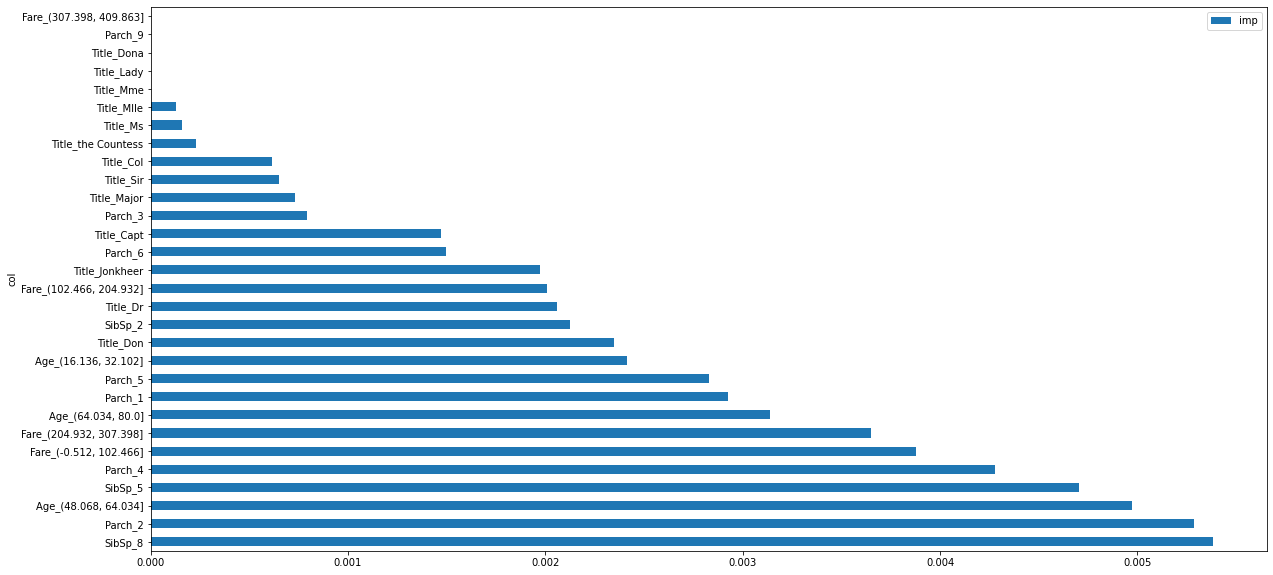

In [72]:
feature_importance(gbt_model, X_train)

## Submission

In [73]:
new_test_df

,Sex,Pclass_1,Pclass_2,Pclass_3,"Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80.0]",SibSp_0,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [74]:
# Make a prediction using the DecisionTreeClassifier model on the wanted columns
predictions = gbt_model.predict(new_test_df)
predictions[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [75]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived']= predictions
submission.head(5)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [76]:
# What does our submission have to look like?
gender_submission_df.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
submission.to_csv('submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
